<a href="https://colab.research.google.com/github/wint3rx3/flowers_classification/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Kaggle API 인증 설정:
#    먼저 자신의 kaggle.json 파일을 Colab에 업로드하세요.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# 2. Kaggle API를 통해 데이터셋 다운로드
!kaggle datasets download -d imsparsh/flowers-dataset

Dataset URL: https://www.kaggle.com/datasets/imsparsh/flowers-dataset
License(s): CC0-1.0
 88% 181M/205M [00:01<00:00, 183MB/s]
100% 205M/205M [00:01<00:00, 169MB/s]


In [3]:
# 3. 다운로드 받은 zip 파일 압축 해제
import zipfile

zip_path = "flowers-dataset.zip"  # 다운로드된 파일 이름
extract_path = "./flowers-dataset"  # 압축을 풀 경로

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("데이터셋 압축 해제 완료!")

데이터셋 압축 해제 완료!


In [4]:
# 4. 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.applications import VGG19, VGG16

In [5]:
IMAGE_SIZE = (224, 224)

In [6]:
# 5. 데이터 로드 함수 정의
def load_train_data(folder_path):
    X = []
    y = []
    class_names = os.listdir(folder_path)
    print("클래스 이름:", class_names)

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [7]:
def load_test_data(folder_path):
    X = []
    filenames = []
    for image_name in os.listdir(folder_path):
        if image_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            filenames.append(image_name)
    X = np.array(X)
    return X, filenames

In [8]:
#6. 데이터 경로 수정 및 데이터 로드
train_folder = "./flowers-dataset/train"
test_folder = "./flowers-dataset/test"
X_train, y_train = load_train_data(train_folder)
X_test, test_filenames = load_test_data(test_folder)

클래스 이름: ['tulip', 'sunflower', 'rose', 'dandelion', 'daisy']


In [9]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
BATCH_SIZE = 128
EPOCHS = 5
NUM_CLASSES = 5

In [13]:
model = Sequential()
model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [14]:
vgg16_base.trainable = False

In [15]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.3110 - loss: 4.7526 - val_accuracy: 0.6455 - val_loss: 0.9874
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 657ms/step - accuracy: 0.7141 - loss: 0.7805 - val_accuracy: 0.7709 - val_loss: 0.6518
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 666ms/step - accuracy: 0.8391 - loss: 0.4714 - val_accuracy: 0.7909 - val_loss: 0.5759
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 688ms/step - accuracy: 0.9268 - loss: 0.2945 - val_accuracy: 0.7909 - val_loss: 0.5706
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 710ms/step - accuracy: 0.9527 - loss: 0.2203 - val_accuracy: 0.8073 - val_loss: 0.5372


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,986,897 (129.65 MB)

 Trainable params: 6,424,069 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,848,140 (49.01 MB)

In [18]:
model.evaluate(X_val,y_val)

18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 401ms/step - accuracy: 0.7866 - loss: 0.5647


[0.5371706485748291, 0.807272732257843]

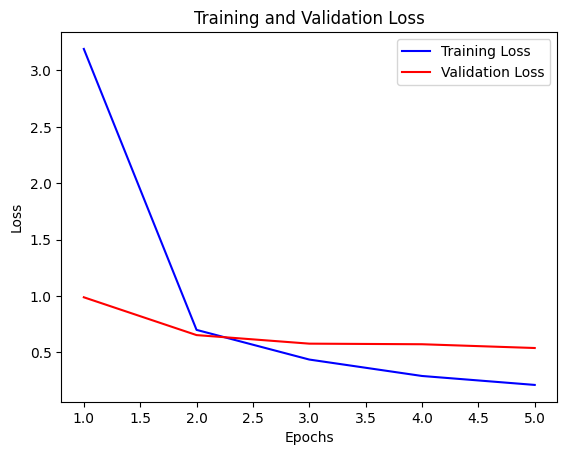

In [19]:
import matplotlib.pyplot as plt

# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b-', label='Training Loss')  # Change 'bo' to 'b-'
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()